## Homework 7: 10-fold cross-validation

In [1]:
import numpy as np
N = 70
np.random.seed(2022)
x = 10*np.random.rand(N,1) - 5
t = 5*x**3 - x**2 + x + 150*np.random.randn(N,1)
N_test = 200
x_test = np.linspace(-5,5,N_test)[:,None]
t_test = 5*x_test**3 - x_test**2 + x_test + 150*np.random.randn(N_test,1)

# Implement your code here

In [2]:
def K_fold(X, y, k=10):
    rng = np.random.default_rng()
    n_samples = X.shape[0]
    idxs = np.arange(n_samples)
    rng.shuffle(idxs)
    
    folds = ([(X[np.delete(idxs, np.s_[_:_ + n_samples // k])], X[idxs[_:_ + n_samples // k]], y[np.delete(idxs, np.s_[_:_ + n_samples // k])], y[idxs[_:_ + n_samples // k]]) for _ in range(0, n_samples - (n_samples % k) * (n_samples // k + 1), n_samples // k)] + 
             [(X[np.delete(idxs, np.s_[_:_ + n_samples // k + 1])], X[idxs[_:_ + n_samples // k + 1]], y[np.delete(idxs, np.s_[_:_ + n_samples // k + 1])], y[idxs[_:_ + n_samples // k + 1]]) for _ in range(n_samples - (n_samples % k) * (n_samples // k + 1), n_samples, n_samples // k + 1)])
    return folds

In [3]:
def train(X, y, order):
    X = np.hstack([X**i for i in range(order + 1)])
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [4]:
def predict(X, w, order):
    X = np.hstack([X**i for i in range(order + 1)])
    return X @ w

In [5]:
max_order = 10
K = 10

folds = K_fold(x, t, k=K)
train_loss = np.zeros((K, max_order+1))
cv_loss = np.zeros((K, max_order+1))
ind_loss = np.zeros((K, max_order+1))

for k in range(K):
    for order in range(max_order+1):
        X_train, X_val, Y_train, Y_val = folds[k]
        w = train(X_train, Y_train, order)
        train_loss[k, order] = np.mean((predict(X_train, w, order) - Y_train)**2)
        cv_loss[k, order] = np.mean((predict(X_val, w, order) - Y_val)**2)
        ind_loss[k, order] = np.mean((predict(x_test, w, order) - t_test)**2)

Text(0, 0.5, 'Mean squared loss')

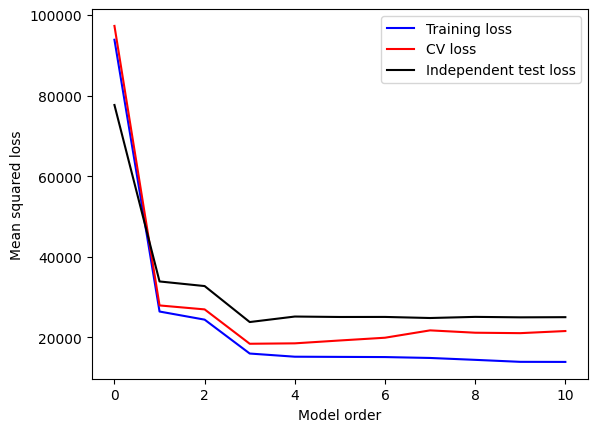

In [6]:
import pylab as plt
%matplotlib inline
order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

<p>As expected, training loss (blue) always decreaes. The CV loss doesn't, and comes to a minimum at around 3rd order (this will not always be the case - it depends on the dataset generated at the start of the notebook). The independent loss typically has a more well-defined minimum.</p>